In [22]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
STOCKS = ["MSFT", "GOOGL", "AMZN", "NVDA", "TSLA"]
stock_data = yf.download(STOCKS, start='2020-01-01', end='2023-10-01')
prices = stock_data["Close"]


[*********************100%***********************]  5 of 5 completed


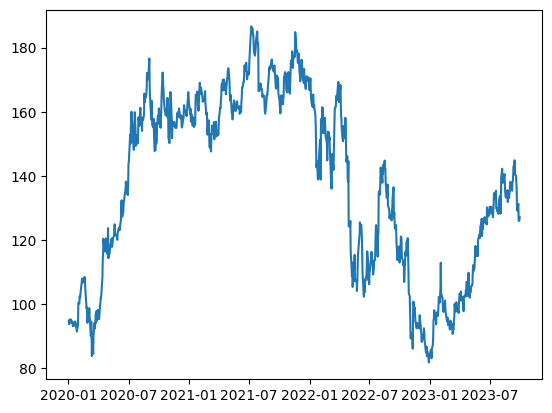

In [87]:
plt.plot(prices["AMZN"])
plt.show()

In [88]:
means = {ticker: prices[ticker].pct_change().mean() + 1 for ticker in STOCKS}
stds = {ticker: prices[ticker].pct_change().std() for ticker in STOCKS}
dt = 1
for t in range(1000):  # 1000 days ahead
    new_prices = {}
    for n in range(2):  # 2 predictions
        for ticker in STOCKS:  # for every chosen stock
            current_price = prices[ticker].iloc[-1]
            predicted_return = (means[ticker] * dt + stds[ticker] * np.random.normal() * np.sqrt(dt))
            new_prices[ticker] = [current_price * predicted_return]
            new_index = prices.index[-1] + pd.Timedelta(days=dt)
    # prices = pd.concat([prices, pd.DataFrame(new_prices, index=[new_index])])
print(prices)

,AMZN,GOOGL,MSFT,NVDA,TSLA
2020-01-02 00:00:00+00:00,94.900497,68.433998,160.619995,5.997750,28.684000
2020-01-03 00:00:00+00:00,93.748497,68.075996,158.619995,5.901750,29.534000
2020-01-06 00:00:00+00:00,95.143997,69.890503,159.029999,5.926500,30.102667
2020-01-07 00:00:00+00:00,95.343002,69.755501,157.580002,5.998250,31.270666
2020-01-08 00:00:00+00:00,94.598503,70.251999,160.089996,6.009500,32.809334
...,...,...,...,...,...
2026-06-21 00:00:00+00:00,183.610670,823.521791,653.357345,135.977434,9059.377299
2026-06-22 00:00:00+00:00,190.155373,843.892911,668.633074,137.067429,9550.839300
2026-06-23 00:00:00+00:00,193.392735,830.681947,659.618434,137.127445,9458.044179
2026-06-24 00:00:00+00:00,196.391132,837.353272,663.669367,142.145203,9193.121421


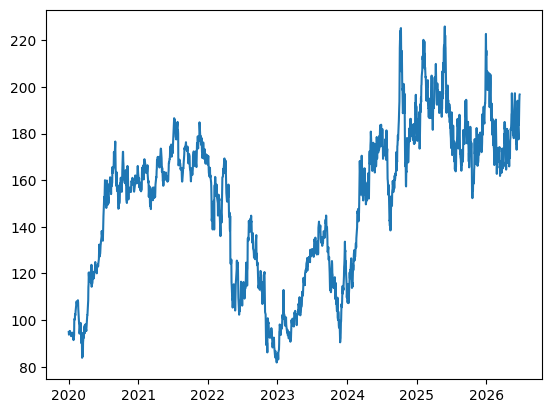

In [89]:
plt.plot(prices["AMZN"])
plt.show()

In [98]:
stock = yf.Ticker("AMZN")
esg_data = stock.sustainability
# print(esg_data)
print(esg_data.loc["peerEnvironmentPerformance"].values[0]["avg"])

2.9348936170212765
